In [1]:
library(ggplot2)
library(dplyr)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ purrr   1.0.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
# ggplot theme #
my_theme0 <- theme(panel.background = element_rect(fill = "transparent", 
                                                colour = NA), plot.background = element_rect(colour = 'NA', 
                                                                                             fill = 'transparent'),panel.grid.major=element_line(color=NA),
                axis.line=element_line(linewidth=1.2,color="black"),
                axis.ticks=element_line(color="black"),
                axis.text=element_text(color="black",size=26),
                axis.title=element_text(color="black",size=30),
                panel.grid.minor = element_line(colour = NA),
                legend.text=element_text(size=17),legend.key=element_rect(fill="white"),
                legend.title=element_text(size=18,face="bold"),
                axis.text.x=element_text(angle=60,size=26,vjust=0.5),
                panel.border = element_rect(colour = "black", fill=NA, size=1),
                legend.position = "none")

my_theme1 <- theme_bw() + 
  theme(panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        text = element_text(size = 16),
        axis.title.x = element_text(size=18, color="black"), 
        axis.title.y = element_text(size=18, color="black"), 
        axis.text.x = element_text(angle = 0, hjust = 1, color="black"), 
        panel.grid.minor.x = element_line(colour = "grey", linewidth=0.2, linetype = 'dashed'),
        panel.grid.major.x = element_line(colour = "grey", linewidth=0.2),
        panel.grid.minor.y = element_line(colour = "grey", linewidth = 0.2, linetype = 'dashed'),
        panel.grid.major.y = element_line(colour = "grey", linewidth=0.2),
        legend.position = "bottom", 
        legend.text=element_text(size=10), 
        legend.key.size = unit(1,"line"), 
        plot.margin=unit(c(1,1,1,1),"cm")
       ) 

In [6]:
pct_meta_file <- "05_MERGED_DEF_Counts_bamcov/DEF_MERGED_min_2000_pct_meta.tsv"
pct_meta_df <- read.table(pct_meta_file, header = T, sep = "\t", as.is = T, stringsAsFactors = F)
HOT_pct_meta_df <- pct_meta_df %>%
  filter(Cruise_Series == "HOT", TotalCnt >= 500) %>% 
  #select(NCBI_SRA_Acc, Collection_Year, Collection_Month, Depth, Eukaryote:TotalCnt)
  select(NCBI_SRA_Acc, Collection_Year, Collection_Month, Collection_Date, Cruise_Station, Latitude, Longitude, Depth, Total_Read_Pairs, Eukaryote:TotalCnt)

BATS_pct_meta_df <- pct_meta_df %>%
  filter(Cruise_Series == "BATS", TotalCnt >= 500) %>% 
  #select(NCBI_SRA_Acc, Collection_Year, Collection_Month, Depth, Eukaryote:TotalCnt)
  select(NCBI_SRA_Acc, Collection_Year, Collection_Month, Collection_Date, Cruise_Station, Latitude, Longitude, Depth, Total_Read_Pairs, Eukaryote:TotalCnt)
head(BATS_pct_meta_df, 2)
head(colnames(pct_meta_df))

,NCBI_SRA_Acc,Collection_Year,Collection_Month,Collection_Date,Cruise_Station,Latitude,Longitude,Depth,Total_Read_Pairs,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,TotalCnt
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,SRR5720327,2003,4,4/22/2003,BATS,31.66,-64.16,10,25711667,13.19656,2.591755,27.72898,54.05630,2.426399,15473838
2,SRR5720326,2003,4,4/22/2003,BATS,31.66,-64.16,80,35336855,32.65089,4.565205,22.22127,33.09899,7.463647,7527526


[1] "Sample_Name"       "Sample_ID"         "Cruise_Series"    
[4] "GEOTRACES_Section" "Cruise_ID"         "Cruise_Station"

* Calculate overall percentages among all clean reads

In [7]:
HOT_pct_meta_df2 <- HOT_pct_meta_df %>% 
  mutate(Eukaryote = Eukaryote * TotalCnt / Total_Read_Pairs) %>% 
  mutate(EukaryoteVirus = EukaryoteVirus * TotalCnt / Total_Read_Pairs) %>% 
  mutate(Plasmid = Plasmid * TotalCnt / Total_Read_Pairs) %>% 
  mutate(Prokaryote = Prokaryote * TotalCnt / Total_Read_Pairs) %>% 
  mutate(ProkaryoteVirus = ProkaryoteVirus * TotalCnt / Total_Read_Pairs) 
head(HOT_pct_meta_df2, 2)

,NCBI_SRA_Acc,Collection_Year,Collection_Month,Collection_Date,Cruise_Station,Latitude,Longitude,Depth,Total_Read_Pairs,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,TotalCnt
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,SRR5720299,2004,2,2/24/2004,StationALOHA,22.75,-158,5,12527291,7.643656,1.381001,8.326301,15.98603,1.803351,4402133
2,SRR5720300,2004,2,2/24/2004,StationALOHA,22.75,-158,100,9825540,4.506796,1.311928,5.819192,12.97392,2.390037,2653080


In [8]:
BATS_pct_meta_df2 <- BATS_pct_meta_df %>% 
  mutate(Eukaryote = Eukaryote * TotalCnt / Total_Read_Pairs) %>% 
  mutate(EukaryoteVirus = EukaryoteVirus * TotalCnt / Total_Read_Pairs) %>% 
  mutate(Plasmid = Plasmid * TotalCnt / Total_Read_Pairs) %>% 
  mutate(Prokaryote = Prokaryote * TotalCnt / Total_Read_Pairs) %>% 
  mutate(ProkaryoteVirus = ProkaryoteVirus * TotalCnt / Total_Read_Pairs) 
head(BATS_pct_meta_df2, 2)

,NCBI_SRA_Acc,Collection_Year,Collection_Month,Collection_Date,Cruise_Station,Latitude,Longitude,Depth,Total_Read_Pairs,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,TotalCnt
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,SRR5720327,2003,4,4/22/2003,BATS,31.66,-64.16,10,25711667,7.941978,1.5597744,16.687903,32.532251,1.460259,15473838
2,SRR5720326,2003,4,4/22/2003,BATS,31.66,-64.16,80,35336855,6.955356,0.9724889,4.733619,7.050811,1.589921,7527526


* create time and depth order
`Depth` groups: 1-60, (1-25, 26-60), 61-125, 126-180

In [9]:
sort(unique(HOT_pct_meta_df2$Depth))

[1]   5  10  25  85 100 115 125 175

In [22]:
#unique(HOT_pct_meta_df.long$Year_Month)
Year_Month_order <- c(
  '2003_1', '2003_2', '2003_3', '2003_4', '2003_5', '2003_6', '2003_7', '2003_8', '2003_10', '2003_11', '2003_12', 
  '2004_2', '2004_4', '2004_5', '2004_6', '2004_8', '2004_9', '2004_10', '2004_11', '2004_12', 
  '2009_8', '2009_11')
MonthRange_order <- c("12-5", "6-11")
DepthRange_order <- c("0-60", "61-125", "126-180")


HOT_pct_meta_df2 <- HOT_pct_meta_df2 %>% 
  mutate(MonthRange = case_when(Collection_Month>=0 & Collection_Month<=5 | Collection_Month==12 ~ "12-5",
                                Collection_Month>=6 & Collection_Month<=11 ~ "6-11")) %>%
  mutate(MonthRange = factor(MonthRange, levels=MonthRange_order)) %>% 
  mutate(Month_Name = month.name[Collection_Month]) %>%
  mutate(Month_Name = factor(Month_Name, levels=month.name)) %>%
  mutate(Year_Month=paste(Collection_Year, Collection_Month, sep = "_")) %>% 
  mutate(Year_Month=factor(Year_Month, levels=Year_Month_order)) %>% 
  mutate(DepthRange = case_when(Depth>=1 & Depth<=60 ~ "0-60",
                                Depth>=61 & Depth<=125 ~ "61-125",
                                Depth>=126 & Depth<=180 ~ "126-180")) %>% 
  mutate(DepthRange = factor(DepthRange, levels=DepthRange_order))
head(HOT_pct_meta_df2, 2)


,NCBI_SRA_Acc,Collection_Year,Collection_Month,Collection_Date,Cruise_Station,Latitude,Longitude,Depth,Total_Read_Pairs,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,TotalCnt,MonthRange,Month_Name,Year_Month,DepthRange
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>
1,SRR5720299,2004,2,2/24/2004,StationALOHA,22.75,-158,5,12527291,7.643656,1.381001,8.326301,15.98603,1.803351,4402133,12-5,February,2004_2,0-60
2,SRR5720300,2004,2,2/24/2004,StationALOHA,22.75,-158,100,9825540,4.506796,1.311928,5.819192,12.97392,2.390037,2653080,12-5,February,2004_2,61-125


In [23]:
HOT_pct_meta_df2.long <- HOT_pct_meta_df2 %>% 
  mutate(Prok_n_Plas = Prokaryote + Plasmid) %>% 
  select(Year_Month, MonthRange, DepthRange, Eukaryote, EukaryoteVirus, Prok_n_Plas, ProkaryoteVirus) %>% 
  gather(Eukaryote:ProkaryoteVirus, key="Seq_Class", value="Percentage") %>% 
  mutate(Seq_Class = factor(Seq_Class, levels=c("Prok_n_Plas", "ProkaryoteVirus", "Eukaryote", "EukaryoteVirus"))) 

head(HOT_pct_meta_df2.long, 2)

#  mutate_if(is.integer, as.character) %>% 
#  group_by(Month_Name, Seq_Class, Depth) %>% 
#  summarise(Mean=mean(Percentage), SD=sd(Percentage)) 

,Year_Month,MonthRange,DepthRange,Seq_Class,Percentage
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,2004_2,12-5,0-60,Eukaryote,7.643656
2,2004_2,12-5,61-125,Eukaryote,4.506796


In [25]:
rects_11 <- data.frame(xmin = seq(1.5, 21.5, 2), 
                    xmax = seq(2.5, 22.5, 2))
rects_1 <- head(rects_11, 1)
head(rects_11, 2)

,xmin,xmax
,<dbl>,<dbl>
1,1.5,2.5
2,3.5,4.5


In [26]:
library(RColorBrewer)
col_4 <- brewer.pal(name="Paired", n=4)
#col_4 <- c("#daa520", "#0a75ad", "#8a2be2", "#047806")
col_4

[1] "#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C"

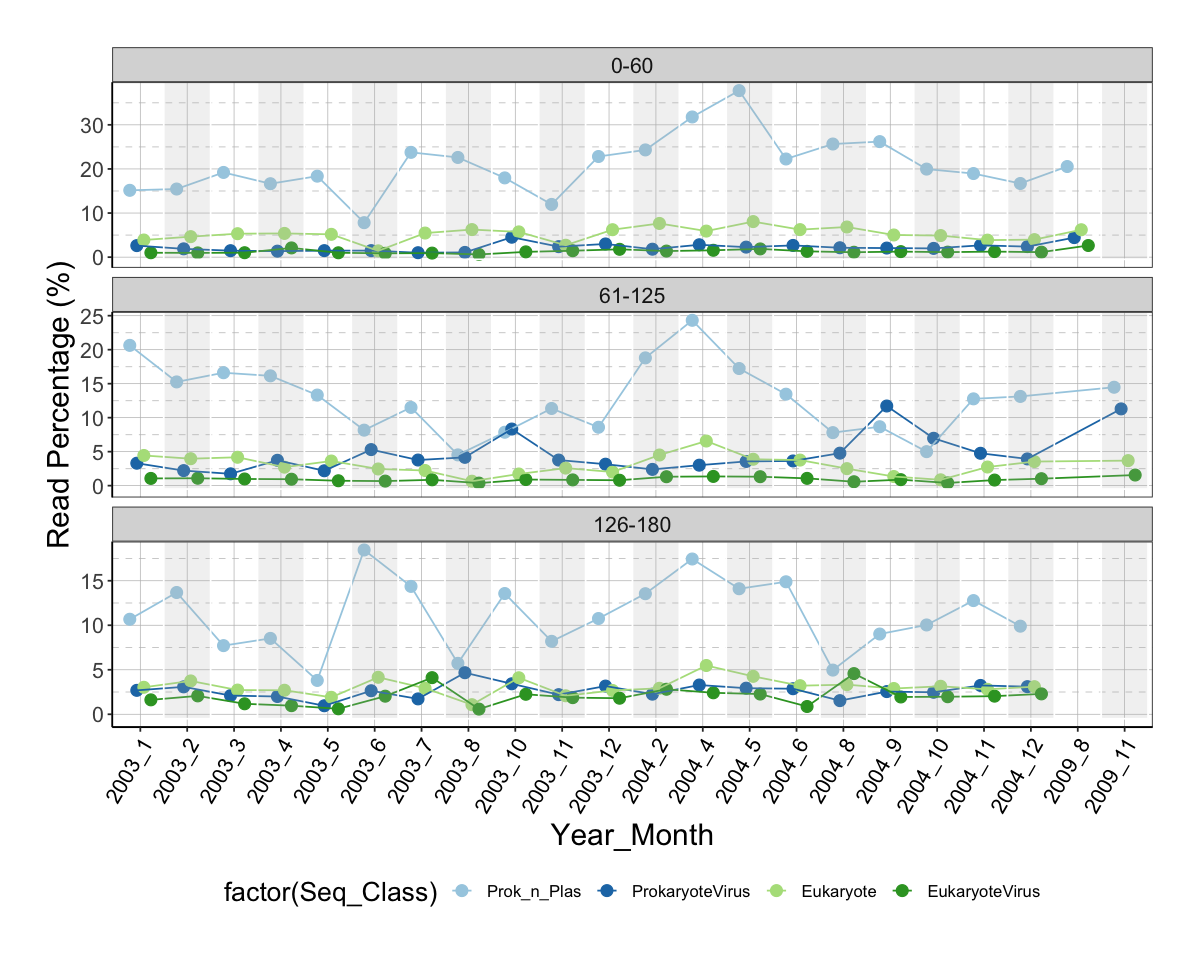

In [67]:
options(repr.plot.width=10, repr.plot.height=8)

p_hot <- ggplot(data=HOT_pct_meta_df2.long, mapping=aes(x=Year_Month, y=Percentage, fill=factor(Seq_Class), color=factor(Seq_Class))) + 
  #geom_boxplot(lwd=1, outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=Seq_Class, fill=Seq_Class), fun=mean, geom="point", pch=21, size=3, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Seq_Class, group=Seq_Class), fun=mean, geom="line", size=0.5, position = position_dodge(width=.6)) +
  geom_rect(data=rects_11, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  #geom_point(aes(color=factor(Seq_Class)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  #geom_hline(yintercept=5, linetype="dashed", color = "red", linewidth=0.5, alpha=0.5) +
  facet_wrap(~DepthRange, nrow = 6, scales = "free_y") + 
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1)) + labs(y="Read Percentage (%)")
p_hot

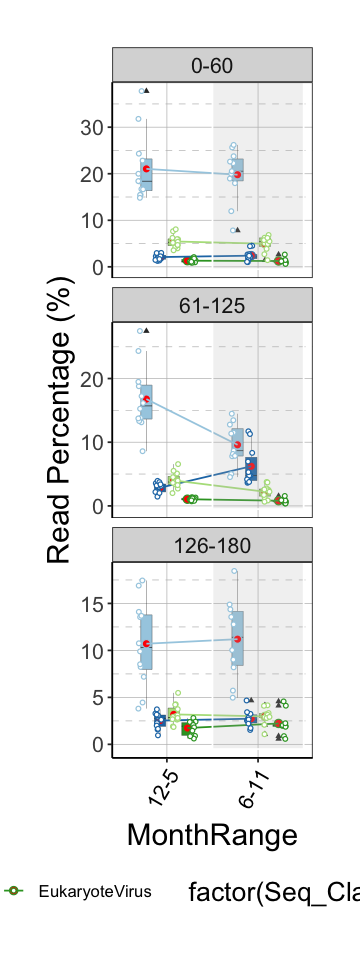

In [70]:
options(repr.plot.width=3, repr.plot.height=8)

p_hot_2 <- ggplot(data=HOT_pct_meta_df2.long, mapping=aes(x=MonthRange, y=Percentage, fill=factor(Seq_Class))) +
  geom_boxplot(lwd=0.1, outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=Seq_Class), fill="red", fun=mean, geom="point", pch=21, size=2, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Seq_Class, group=Seq_Class), fun=mean, geom="line", size=0.5, position = position_dodge(width=.6)) +
  geom_rect(data=rects_1, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Seq_Class)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  #geom_hline(yintercept=5, linetype="dashed", color = "red", linewidth=0.5, alpha=0.5) +
  facet_wrap(~DepthRange, nrow = 4, scales = "free_y") + 
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1)) + labs(y="Read Percentage (%)")
p_hot_2

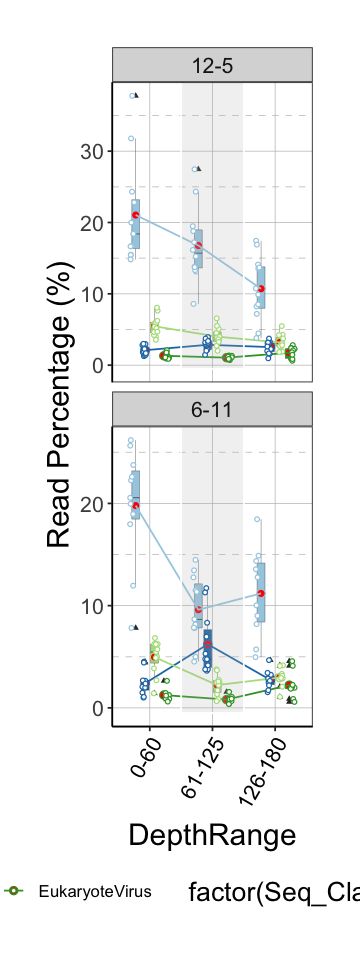

In [71]:
options(repr.plot.width=3, repr.plot.height=8)

p_hot_3 <- ggplot(data=HOT_pct_meta_df2.long, mapping=aes(x=DepthRange, y=Percentage, fill=factor(Seq_Class))) + 
  geom_boxplot(lwd=0.1, outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=Seq_Class), fill="red", fun=mean, geom="point", pch=21, size=2, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Seq_Class, group=Seq_Class), fun=mean, geom="line", size=0.5, position = position_dodge(width=.6)) +
  geom_rect(data=rects_1, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Seq_Class)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  #geom_hline(yintercept=5, linetype="dashed", color = "red", linewidth=0.5, alpha=0.5) +
  facet_wrap(~MonthRange, nrow = 4, scales = "free_y") + 
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1)) + labs(y="Read Percentage (%)")
p_hot_3


In [30]:
## Gives count, mean, standard deviation, standard error of the mean, and confidence interval (default 95%).
##   data: a data frame.
##   measurevar: the name of a column that contains the variable to be summariezed
##   groupvars: a vector containing names of columns that contain grouping variables
##   na.rm: a boolean that indicates whether to ignore NA's
##   conf.interval: the percent range of the confidence interval (default is 95%)
summarySE <- function(data=NULL, measurevar, groupvars=NULL, na.rm=FALSE,
                      conf.interval=.95, .drop=TRUE) {
    library(plyr)

    # New version of length which can handle NA's: if na.rm==T, don't count them
    length2 <- function (x, na.rm=FALSE) {
        if (na.rm) sum(!is.na(x))
        else       length(x)
    }

    # This does the summary. For each group's data frame, return a vector with
    # N, mean, and sd
    datac <- ddply(data, groupvars, .drop=.drop,
      .fun = function(xx, col) {
        c(N    = length2(xx[[col]], na.rm=na.rm),
          mean = mean   (xx[[col]], na.rm=na.rm),
          sd   = sd     (xx[[col]], na.rm=na.rm)
        )
      },
      measurevar
    )

    # Rename the "mean" column    
    datac <- rename(datac, c("mean" = measurevar))

    datac$se <- datac$sd / sqrt(datac$N)  # Calculate standard error of the mean

    # Confidence interval multiplier for standard error
    # Calculate t-statistic for confidence interval: 
    # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
    ciMult <- qt(conf.interval/2 + .5, datac$N-1)
    datac$ci <- datac$se * ciMult

    return(datac)
}

In [31]:
HOT_pct_meta_df2.long.se <- summarySE(HOT_pct_meta_df2.long, measurevar="Percentage", groupvars=c("DepthRange","MonthRange", "Seq_Class"))
head(HOT_pct_meta_df2.long.se, 2)

,DepthRange,MonthRange,Seq_Class,N,Percentage,sd,se,ci
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0-60,12-5,Prok_n_Plas,12,21.045360,7.1529817,2.0648880,4.5447878
2,0-60,12-5,ProkaryoteVirus,12,2.096344,0.6128311,0.1769091,0.3893743


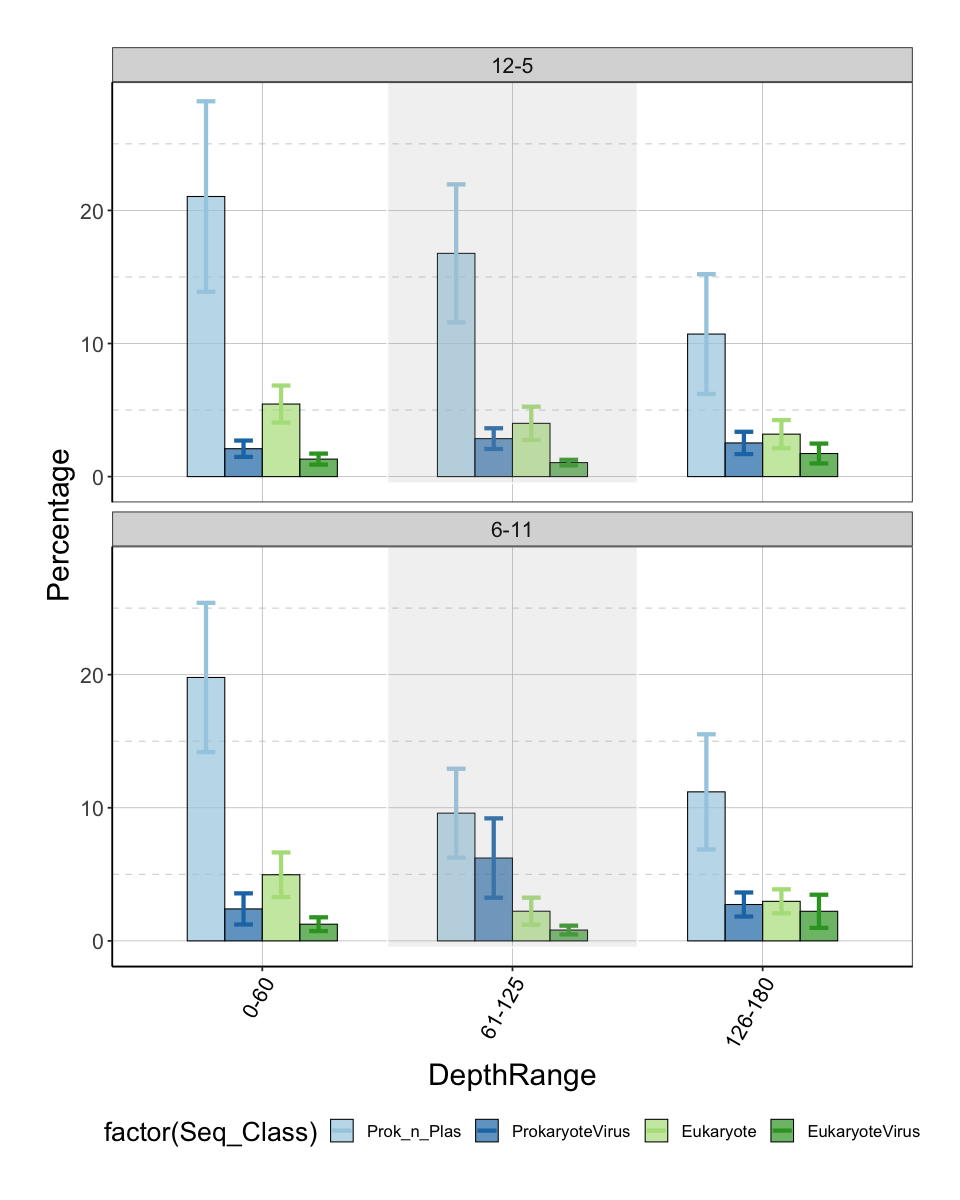

In [32]:
options(repr.plot.width=8, repr.plot.height=10)

p_hot_4 <- ggplot(data=HOT_pct_meta_df2.long.se) +
  geom_bar(mapping=aes(x=DepthRange, y=Percentage, fill=factor(Seq_Class)), 
           position=position_dodge(.6), width=0.6, stat="summary", fun="mean", colour="black", size=.3, alpha=0.7) + 
  geom_errorbar(aes(x=DepthRange, ymin=Percentage-sd, ymax=Percentage+sd, color=factor(Seq_Class)), 
           position = position_dodge(width=.6), width=0.3, alpha=1, size=1.2) +
  geom_rect(data=rects_1, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2) +
  facet_wrap(~MonthRange, nrow = 4) + 
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))

p_hot_4

In [33]:
# unique(BATS_pct_meta_df.long$Year_Month)
Year_Month_Order <- c(
  '2003_2', '2003_3', '2003_4', '2003_5', '2003_7', '2003_8', '2003_10', '2003_11', '2003_12',
  '2004_1', '2004_2', '2004_3', '2004_4', '2004_5', '2004_6', '2004_8', '2004_9', '2004_10', '2004_11', '2004_12', 
  '2009_7', '2009_11')

MonthRange_order <- c("12-5", "6-11")
DepthRange_order <- c("0-60", "61-125", "126-180")

BATS_pct_meta_df2 <- BATS_pct_meta_df2 %>%
  mutate(MonthRange = case_when(Collection_Month>=0 & Collection_Month<=5 | Collection_Month==12 ~ "12-5",
                                Collection_Month>=6 & Collection_Month<=11 ~ "6-11")) %>%
  mutate(MonthRange = factor(MonthRange, levels=MonthRange_order)) %>% 
  mutate(Month_Name = month.name[Collection_Month]) %>%
  mutate(Month_Name = factor(Month_Name, levels=month.name)) %>%
  mutate(Year_Month=paste(Collection_Year, Collection_Month, sep = "_")) %>% 
  mutate(Year_Month=factor(Year_Month, levels=Year_Month_Order)) %>% 
  mutate(DepthRange = case_when(Depth>=1 & Depth<=60 ~ "0-60",
                                Depth>=61 & Depth<=125 ~ "61-125",
                                Depth>=126 & Depth<=180 ~ "126-180")) %>% 
  mutate(DepthRange = factor(DepthRange, levels=DepthRange_order))

head(BATS_pct_meta_df2, 2)


,NCBI_SRA_Acc,Collection_Year,Collection_Month,Collection_Date,Cruise_Station,Latitude,Longitude,Depth,Total_Read_Pairs,Eukaryote,EukaryoteVirus,Plasmid,Prokaryote,ProkaryoteVirus,TotalCnt,MonthRange,Month_Name,Year_Month,DepthRange
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,<fct>
1,SRR5720327,2003,4,4/22/2003,BATS,31.66,-64.16,10,25711667,7.941978,1.5597744,16.687903,32.532251,1.460259,15473838,12-5,April,2003_4,0-60
2,SRR5720326,2003,4,4/22/2003,BATS,31.66,-64.16,80,35336855,6.955356,0.9724889,4.733619,7.050811,1.589921,7527526,12-5,April,2003_4,61-125


In [34]:
BATS_pct_meta_df2.long <- BATS_pct_meta_df2 %>% 
  mutate(Prok_n_Plas = Prokaryote + Plasmid) %>% 
  select(Year_Month, MonthRange, DepthRange, Eukaryote, EukaryoteVirus, Prok_n_Plas, ProkaryoteVirus) %>% 
  gather(Eukaryote:ProkaryoteVirus, key="Seq_Class", value="Percentage") %>% 
  mutate(Seq_Class = factor(Seq_Class, levels=c("Prok_n_Plas", "ProkaryoteVirus", "Eukaryote", "EukaryoteVirus"))) 

head(BATS_pct_meta_df2.long, 2)

,Year_Month,MonthRange,DepthRange,Seq_Class,Percentage
,<fct>,<fct>,<fct>,<fct>,<dbl>
1,2003_4,12-5,0-60,Eukaryote,7.941978
2,2003_4,12-5,61-125,Eukaryote,6.955356


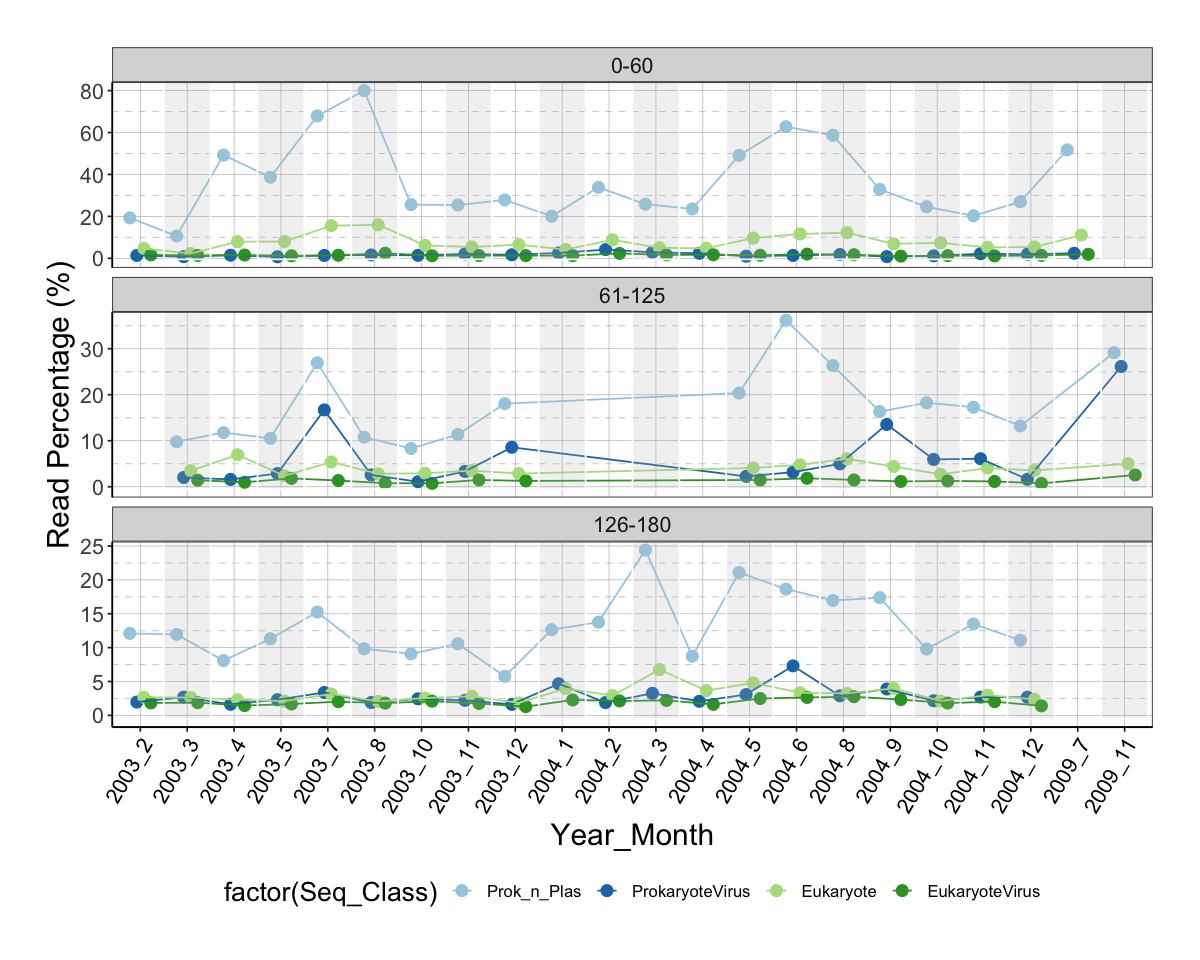

In [72]:
options(repr.plot.width=10, repr.plot.height=8)

p_bats <- ggplot(data=BATS_pct_meta_df2.long, mapping=aes(x=Year_Month, y=Percentage, fill=factor(Seq_Class), color=factor(Seq_Class))) +
  #geom_boxplot(lwd=1, outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +
  stat_summary(aes(color=Seq_Class, fill=Seq_Class), fun=mean, geom="point", pch=21, size=3, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Seq_Class, group=Seq_Class), fun=mean, geom="line", size=0.5, position = position_dodge(width=.6)) +
  geom_rect(data=rects_11, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  #geom_point(aes(color=factor(Seq_Class)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  #geom_hline(yintercept=5, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  facet_wrap(~DepthRange, nrow = 6, scales = "free_y") + 
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1)) + labs(y="Read Percentage (%)")


p_bats

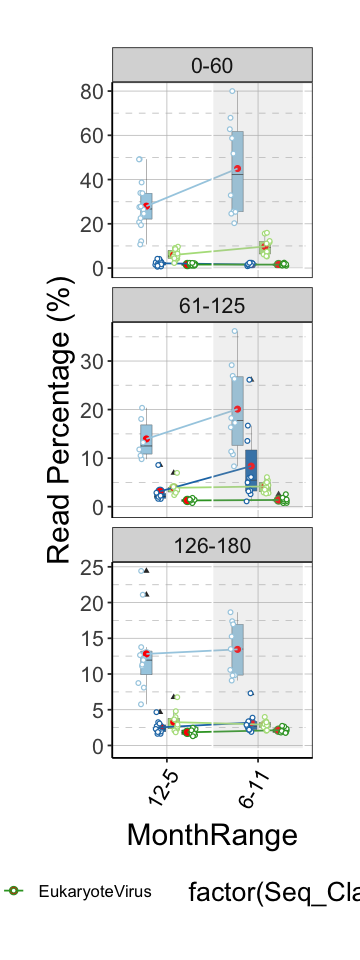

In [73]:
options(repr.plot.width=3, repr.plot.height=8)

p_bats_2 <- ggplot(data=BATS_pct_meta_df2.long, mapping=aes(x=MonthRange, y=Percentage, fill=factor(Seq_Class))) + 
  geom_boxplot(lwd=0.1, outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=Seq_Class), fill="red", fun=mean, geom="point", pch=21, size=2, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Seq_Class, group=Seq_Class), fun=mean, geom="line", size=0.5, position = position_dodge(width=.6)) +
  geom_rect(data=rects_1, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Seq_Class)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  #geom_hline(yintercept=5, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  facet_wrap(~DepthRange, nrow = 4, scales = "free_y") + 
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1)) + labs(y="Read Percentage (%)")
p_bats_2

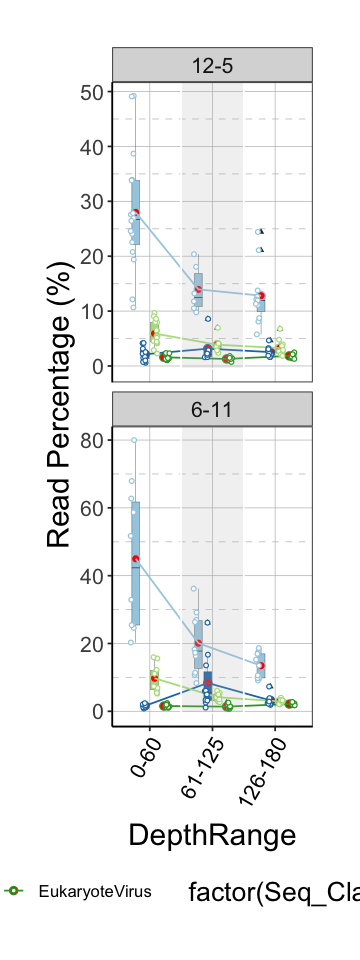

In [74]:
options(repr.plot.width=3, repr.plot.height=8)

p_bats_3 <- ggplot(data=BATS_pct_meta_df2.long, mapping=aes(x=DepthRange, y=Percentage, fill=factor(Seq_Class))) + 
  geom_boxplot(lwd=0.1, outlier.shape=17, outlier.size=1, notch=FALSE, position=position_dodge(.6), width=0.5) +  
  stat_summary(aes(color=Seq_Class), fill="red", fun=mean, geom="point", pch=21, size=2, position = position_dodge(width=.6)) +
  stat_summary(aes(color=Seq_Class, group=Seq_Class), fun=mean, geom="line", size=0.5, position = position_dodge(width=.6)) +
  geom_rect(data=rects_1, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2, inherit.aes = FALSE) +
  geom_point(aes(color=factor(Seq_Class)), size=1, pch = 21, position = position_jitterdodge(0.2), fill="white") +
  #geom_hline(yintercept=5, linetype="dashed", color = "red", size=0.5, alpha=0.5) +
  facet_wrap(~MonthRange, nrow = 4, scales = "free_y") + 
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1)) + labs(y="Read Percentage (%)")
p_bats_3

In [39]:
BATS_pct_meta_df2.long.se <- summarySE(BATS_pct_meta_df2.long, measurevar="Percentage", groupvars=c("DepthRange","MonthRange", "Seq_Class"))
head(BATS_pct_meta_df2.long.se)

,DepthRange,MonthRange,Seq_Class,N,Percentage,sd,se,ci
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0-60,12-5,Prok_n_Plas,16,27.984078,11.0109554,2.7527389,5.8673240
2,0-60,12-5,ProkaryoteVirus,16,2.141753,1.1011527,0.2752882,0.5867628
3,0-60,12-5,Eukaryote,16,5.914954,2.2176761,0.5544190,1.1817162
4,0-60,12-5,EukaryoteVirus,16,1.584430,0.4573963,0.1143491,0.2437293
5,0-60,6-11,Prok_n_Plas,10,44.986584,21.6861956,6.8577772,15.5133698
6,0-60,6-11,ProkaryoteVirus,10,1.617796,0.4938020,0.1561539,0.3532447


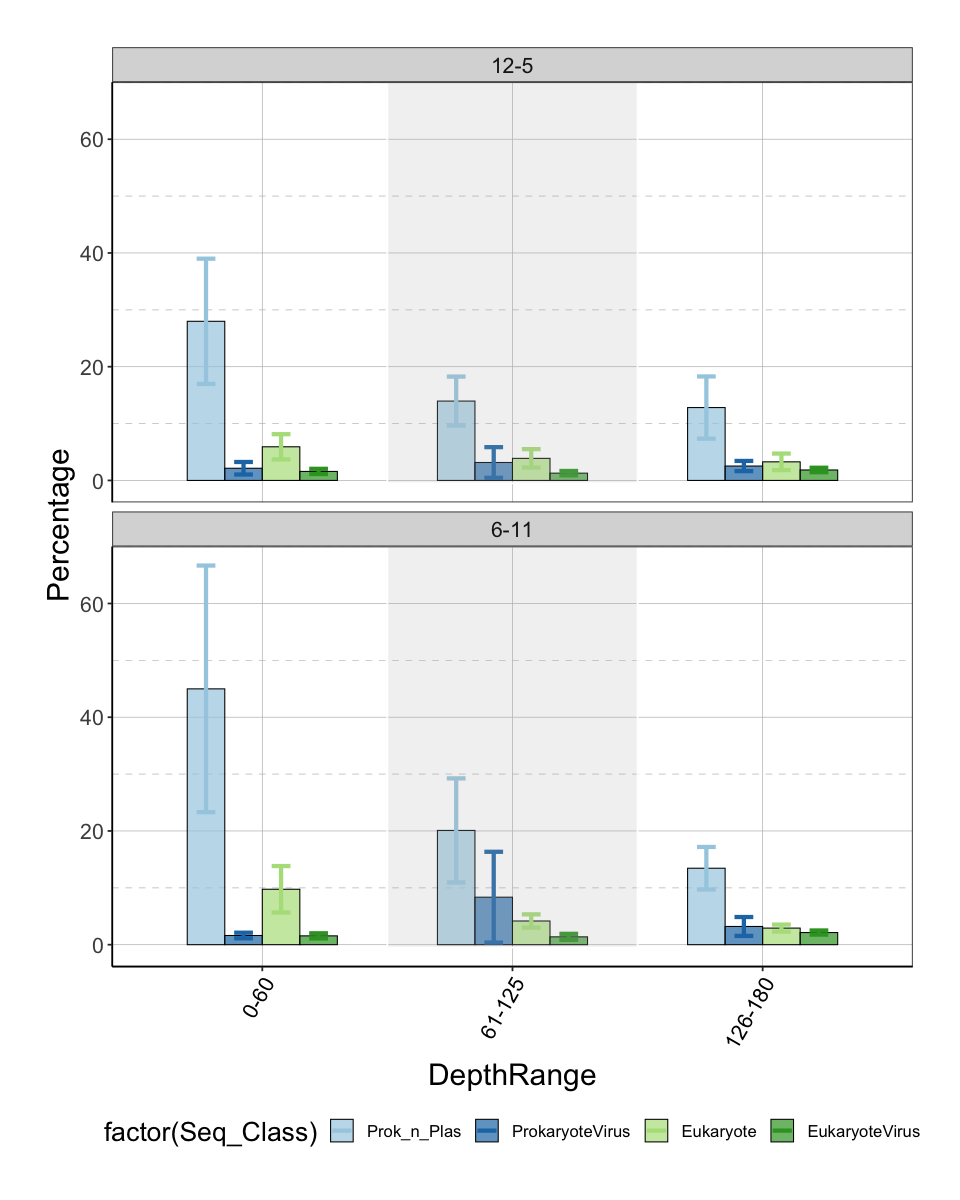

In [40]:
options(repr.plot.width=8, repr.plot.height=10)

p_bats_4 <- ggplot(data=BATS_pct_meta_df2.long.se) +
  geom_bar(mapping=aes(x=DepthRange, y=Percentage, fill=factor(Seq_Class)), 
           position=position_dodge(.6), width=0.6, stat="summary", fun="mean", colour="black", size=.3, alpha=0.7) + 
  geom_errorbar(aes(x=DepthRange, ymin=Percentage-sd, ymax=Percentage+sd, color=factor(Seq_Class)), 
           position = position_dodge(width=.6), width=0.3, alpha=1, size=1.2) +
  geom_rect(data=rects_1, mapping=aes(xmin=xmin, xmax=xmax, ymin = -0.5, ymax = Inf), fill="grey", color="white", alpha = 0.2) +
  facet_wrap(~MonthRange, nrow = 4) + 
  scale_fill_manual(values = col_4)+ scale_color_manual(values = col_4) + 
  my_theme1 + theme(axis.text.x=element_text(angle=60,vjust=1))

p_bats_4

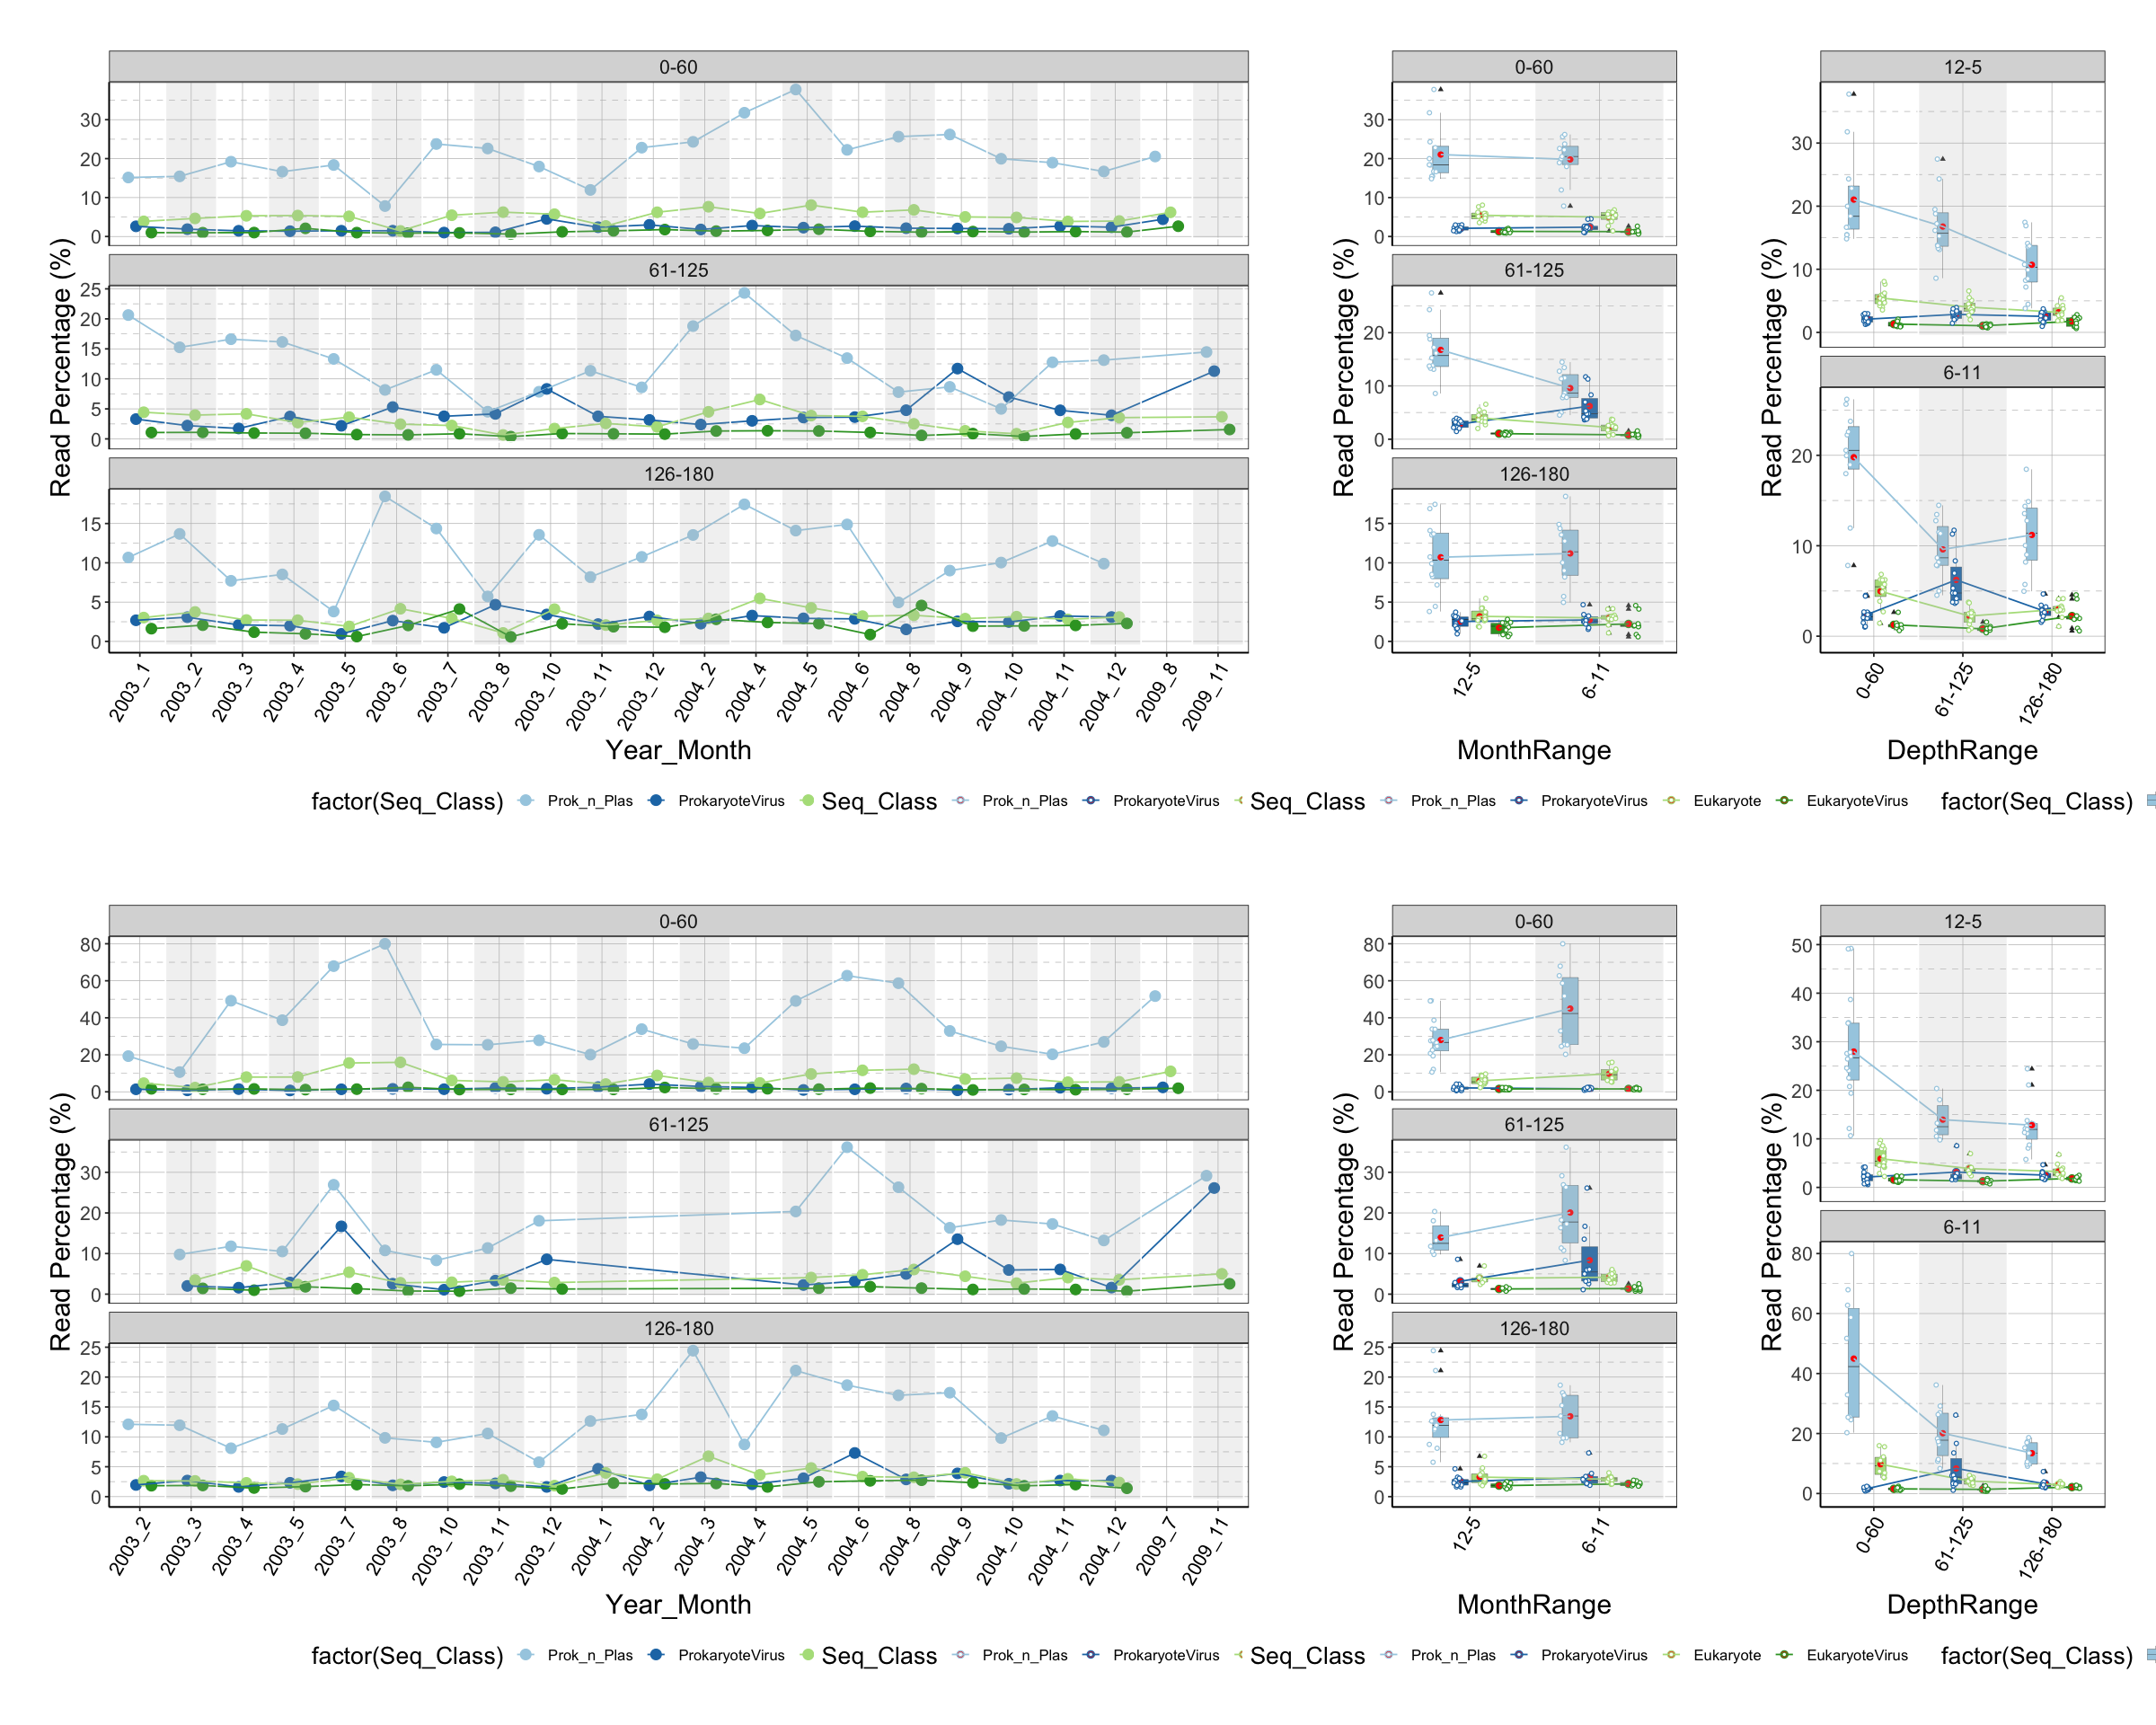

In [75]:
options(repr.plot.width=20, repr.plot.height=16)

library(patchwork)
p_merge <- (p_hot + p_hot_2 + p_hot_3 + p_bats + p_bats_2 + p_bats_3) + plot_layout(widths = c(4, 1, 1))
p_merge

In [76]:
ggsave(filename="bioGEOTRACES_DEF_Class_Percentages_HOTBATS_boxplot_v1.pdf", 
       plot = last_plot(), path="./", useDingbats=FALSE,
       scale = 1, width = 400, height = 320, units = "mm",
       dpi = 300, limitsize = FALSE)

In [87]:
mean(HOT_pct_meta_df2$Prokaryote + HOT_pct_meta_df2$Plasmid)
mean(HOT_pct_meta_df2$Eukaryote)
mean(HOT_pct_meta_df2$ProkaryoteVirus)
mean(HOT_pct_meta_df2$EukaryoteVirus)
cat("--------- HOT -------------------")
max(HOT_pct_meta_df2$Prokaryote + HOT_pct_meta_df2$Plasmid)
max(HOT_pct_meta_df2$Eukaryote)
max(HOT_pct_meta_df2$ProkaryoteVirus)
max(HOT_pct_meta_df2$EukaryoteVirus)

[1] 14.96392

[1] 3.832719

[1] 3.117253

[1] 1.385678

--------- HOT -------------------

[1] 37.75674

[1] 8.062924

[1] 11.71393

[1] 4.569941

In [88]:
mean(BATS_pct_meta_df2$Prokaryote + BATS_pct_meta_df2$Plasmid)
mean(BATS_pct_meta_df2$Eukaryote)
mean(BATS_pct_meta_df2$ProkaryoteVirus)
mean(BATS_pct_meta_df2$EukaryoteVirus)
cat("---------- BATS ------------------")
max(BATS_pct_meta_df2$Prokaryote + BATS_pct_meta_df2$Plasmid)
max(BATS_pct_meta_df2$Eukaryote)
max(BATS_pct_meta_df2$ProkaryoteVirus)
max(BATS_pct_meta_df2$EukaryoteVirus)

[1] 23.29429

[1] 5.150806

[1] 3.380911

[1] 1.642256

---------- BATS ------------------

[1] 79.99214

[1] 15.94661

[1] 26.13566

[1] 2.748196